Project description

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.
In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.
(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.)
The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

In [2]:
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV

In [3]:
try:
    df=pd.read_csv('games.csv')
except:
    df=pd.read_csv('/datasets/games.csv')

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
#Convert column names to lowercase
df.columns=df.columns.str.lower()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Preprocessing

In [7]:
#Drop na values in year and name
df.dropna(subset=['year_of_release', 'name'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [9]:
#Convert year to int
df.year_of_release=df.year_of_release.astype('int32')

In [10]:
#Check values for user score, as it is an object
df.user_score.value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.3       2
0.6       2
2.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [11]:
#Convert tbd to nan values, so can be converted to float
df.user_score=df.user_score.replace('tbd', np.nan)

In [12]:
#Check if above has worked
df.user_score.value_counts()

7.8    322
8      285
8.2    276
8.3    252
7.5    249
      ... 
2.3      2
1.9      2
0.2      2
9.7      1
0        1
Name: user_score, Length: 95, dtype: int64

In [13]:
#Convert user score to float
df.user_score=df.user_score.astype('float64')

In [14]:
#Add sales columns and create new column
df['sales_total']=df['eu_sales']+df['na_sales']+df['jp_sales']+df['other_sales']

## Conclusion

Converted column names to lowercase.<br>
Year of release converted to integer.<br>
Replace tbf to nan for conversion to float.<br>
Total sales created.

# Graphs and Analysis

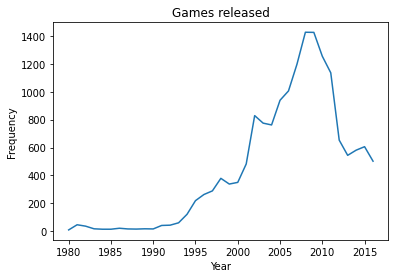

In [15]:
#Plot for count of unique titles per year
df.groupby('year_of_release').name.count().plot()
plt.title('Games released')
plt.xlabel('Year')
plt.ylabel('Frequency');

Games produced per year increased significantly around the year 2000, with the years prior having little releases.<br>
Peak releases around 2008, and a decline after.

In [16]:
#New variable created for sales total grouped by year of release and platform, unstacked for readability
platform_sales=df.groupby(['year_of_release', 'platform']).sales_total.sum().unstack(1)

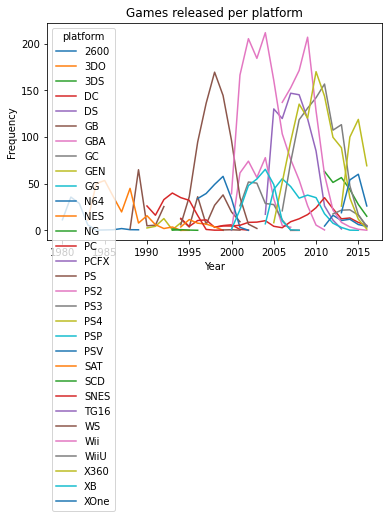

In [17]:
#Graph of above variable
platform_sales.plot()
plt.title('Games released per platform')
plt.xlabel('Year')
plt.ylabel('Frequency');

Many data points, graph hard to read.

In [18]:
#Create a varaible showing only the 10 highest sales platforms
top_platforms=platform_sales.sum().sort_values().index[-10:]

In [19]:
top_platforms

Index(['3DS', 'PSP', 'GBA', 'PS4', 'PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2'], dtype='object', name='platform')

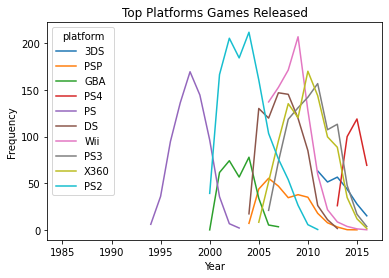

In [20]:
#Graph of the above variable
platform_sales[top_platforms].plot()
plt.title('Top Platforms Games Released')
plt.xlabel('Year')
plt.ylabel('Frequency');

In [21]:
#Sum of cells with sale data
(~platform_sales[top_platforms].isna()).sum()

platform
3DS      6
PSP     12
GBA      8
PS4      4
PS      10
DS      11
Wii     11
PS3     11
X360    12
PS2     12
dtype: int64

In [22]:
#Check max year on dataframe
df.year_of_release.max()

2016

The top platforms have a maximum of 12 years before titles stop being sold.

In [23]:
#Only values from 2014 to be used
df=df[df['year_of_release']>2014]

In [24]:
#Grouped dataframe to show sales total of each platform by year, unstacked for readability
df.groupby(['year_of_release', 'platform']).sales_total.sum().unstack(1)

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [25]:
#Calculate the differences from previous year on above dataframe
df.groupby(['year_of_release', 'platform']).sales_total.sum().unstack(1).diff(axis=0)

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,-12.64,-3.27,-13.22,-49.65,NaN,-2.0,-0.96,-11.75,-10.44,-33.99


The leading platforms for sales in 2016 are PS4 and XOne.<br>

The platforms with the least shrink of sales were the PC and the PSV.<br>
The platforms with the largest shrink of sales were the PS4 and the XOne.

In [26]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

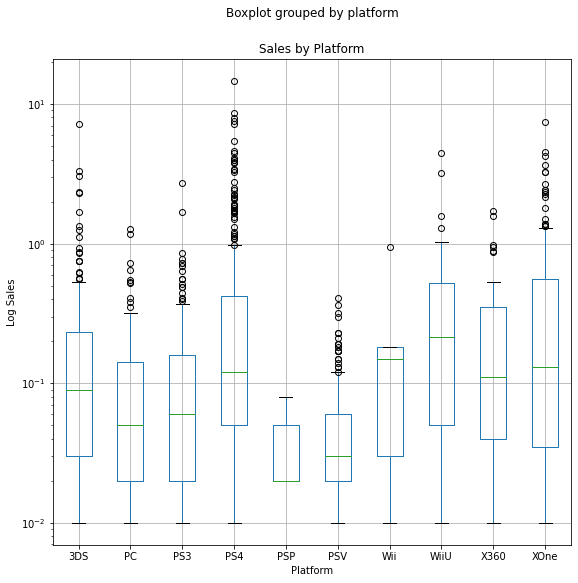

In [27]:
#Boxplot for platform and sales total, log scale for readability
df.boxplot(by='platform', column='sales_total', figsize=(9,9))
plt.title('Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Log Sales')
plt.yscale('log');

The WiiU has the highest median sales, and the PC has the lowest median sales.<br>

The PS4 and XOne have the largest interquartile ranges.<br>

The PS4 also has the most outliers in sales.

In [28]:
#Create dataframe for PS4 data only
ps4sales=df[df['platform']=='PS4']

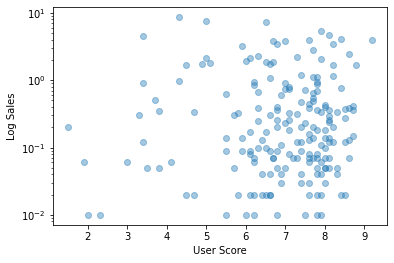

In [29]:
#Scatter plot for PS4 User Score and Sales Total
plt.scatter(ps4sales['user_score'], ps4sales['sales_total'], alpha=(0.4))
plt.yscale('log')
plt.xlabel('User Score')
plt.ylabel('Log Sales');

User score seems to have little impact on the total sales, as high user scores can mean both high sales and low sales, low user score can also mean high sales and low sales.

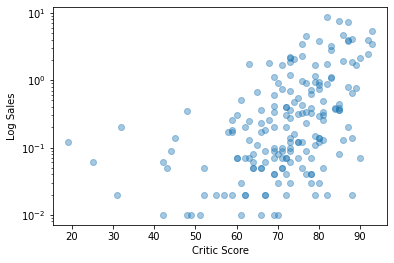

In [30]:
#Scatter plot for PS4 Critic Score and Sales Total
plt.scatter(ps4sales['critic_score'], ps4sales['sales_total'], alpha=(0.4))
plt.yscale('log')
plt.xlabel('Critic Score')
plt.ylabel('Log Sales');

Critic score has more of an impact on the total sales, there is a slight trend on higher critic score and total sales.

In [31]:
#Correlation data for ps4sales dataframe
ps4sales.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_total
year_of_release,1.000000,-0.164633,-0.125109,-0.079977,-0.155549,-0.018455,0.016125,-0.152557
na_sales,-0.164633,1.000000,0.747461,0.446473,0.936805,0.406409,-0.026921,0.917233
eu_sales,-0.125109,0.747461,1.000000,0.417355,0.932506,0.310625,-0.086974,0.948745
jp_sales,-0.079977,0.446473,0.417355,1.000000,0.462652,0.366784,0.185471,0.496600
other_sales,-0.155549,0.936805,0.932506,0.462652,1.000000,0.394959,-0.065671,0.997817
critic_score,-0.018455,0.406409,0.310625,0.366784,0.394959,1.000000,0.533330,0.392849
user_score,0.016125,-0.026921,-0.086974,0.185471,-0.065671,0.533330,1.000000,-0.059738
sales_total,-0.152557,0.917233,0.948745,0.496600,0.997817,0.392849,-0.059738,1.000000


The correlation for user score and sales is -0.06, there is no correlation between these.<br>
The correlation for critic score and sales is 0.39, there is a moderate positive correlation between these variables.

In [32]:
#New variable for games on at least 2 platforms
multi_platform = df.groupby('name'
                           ).filter(lambda x: x['platform'].count()> 2.
                                   ).groupby(['name','platform']).sales_total.sum().unstack()

In [33]:
multi_platform

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,
Adventure Time: Finn & Jake Investigations,0.09,NaN,0.08,0.10,NaN,NaN,0.05,0.09,0.05
Aegis of Earth: Protonovus Assault,NaN,NaN,0.02,0.02,0.03,NaN,NaN,NaN,NaN
Arslan: The Warriors of Legend,NaN,NaN,0.05,0.09,NaN,NaN,NaN,NaN,0.01
Assassin's Creed Chronicles,NaN,NaN,NaN,0.08,0.07,NaN,NaN,NaN,0.01
Assassin's Creed Syndicate,NaN,0.22,NaN,3.39,NaN,NaN,NaN,NaN,1.29
...,...,...,...,...,...,...,...,...,...
WWE 2K17,NaN,NaN,0.14,0.60,NaN,NaN,NaN,0.10,0.26
Wasteland 2,NaN,0.10,NaN,0.12,NaN,NaN,NaN,NaN,0.06
Wolfenstein: The Old Blood,NaN,0.08,NaN,0.43,NaN,NaN,NaN,NaN,0.15


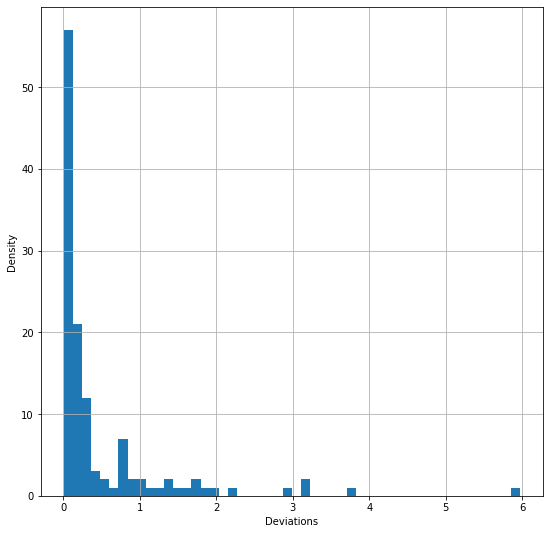

In [34]:
#Graph to show standard deviation of sales accross platforms
multi_platform.std(1).hist(bins=50, figsize=(9,9))
plt.xlabel('Deviations')
plt.ylabel('Density');

Histogram shows the standard deviations away from the mean each platform is, most are around 0-1, the platforms have similar sales.

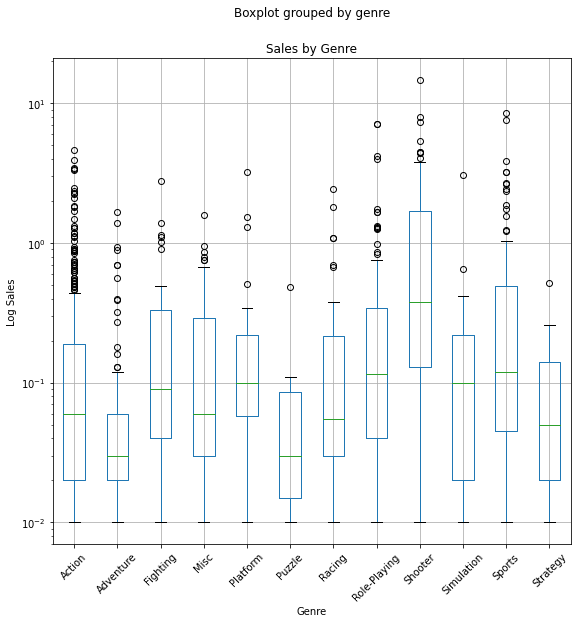

In [35]:
#Boxplot for sales total by genre, log scale
df.boxplot(by='genre', column='sales_total', figsize=(9,9))
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Log Sales');

Shooters have the highest median sales, Puzzle games have the lowest median sales.<br>

Simulation games have the largest interquartile range, Puzzle games having the smallest.<br>

Action game have the largest number of outliers.

In [36]:
#New variable for platform by region of sales
region_profile_platform=df.groupby('platform')[['eu_sales', 'jp_sales', 'na_sales']].sum()

In [37]:
#Loop to print largest platform of each region
for region in (['eu_sales', 'jp_sales', 'na_sales']):
    print(region)
    print(region_profile_platform[region].nlargest(5))  

eu_sales
platform
PS4     83.54
XOne    28.10
PC       9.10
3DS      7.39
PS3      7.30
Name: eu_sales, dtype: float64
jp_sales
platform
3DS     23.55
PS4     12.05
PSV      8.41
PS3      4.97
WiiU     4.12
Name: jp_sales, dtype: float64
na_sales
platform
PS4     63.86
XOne    50.30
3DS     10.31
WiiU     8.86
X360     8.05
Name: na_sales, dtype: float64


In [38]:
#New variable for genre by region
region_profile_genre=df.groupby('genre')[['eu_sales','jp_sales', 'na_sales']].sum()

In [39]:
#Loop to print largest for each region
for region in (['eu_sales', 'jp_sales', 'na_sales']):
    print(region)
    print(region_profile_genre[region].nlargest(5))

eu_sales
genre
Shooter         40.28
Action          34.82
Sports          27.82
Role-Playing    17.21
Racing           6.52
Name: eu_sales, dtype: float64
jp_sales
genre
Action          23.05
Role-Playing    13.41
Shooter          3.79
Misc             3.19
Adventure        2.22
Name: jp_sales, dtype: float64
na_sales
genre
Shooter         48.18
Action          33.68
Sports          26.31
Role-Playing    19.82
Misc             5.58
Name: na_sales, dtype: float64


In [40]:
#Check what values are in ['rating']
df.rating.value_counts()

T       192
E       153
M       149
E10+    101
Name: rating, dtype: int64

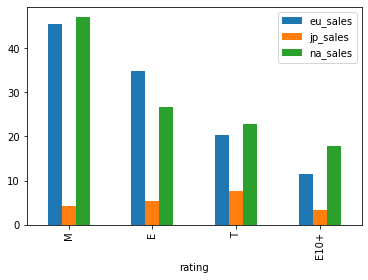

In [41]:
#Plot a bar for sales by rating, sorted for na_sales
df.groupby('rating')[['eu_sales', 'jp_sales', 'na_sales']].sum().sort_values(by='na_sales',
                                                                             ascending=False).plot(kind='bar');

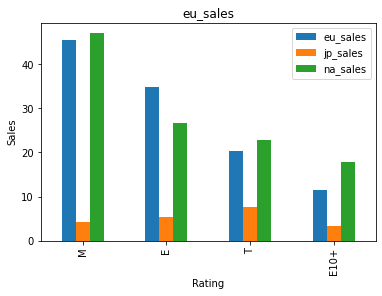

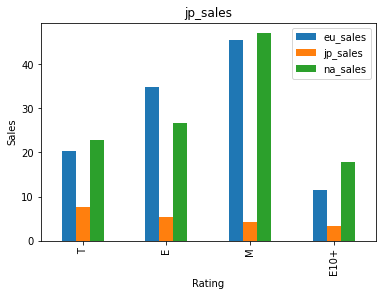

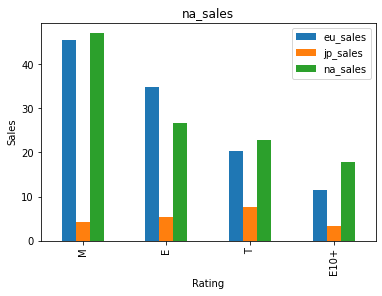

In [42]:
#Loop for above graph, looping region for each
for region in (['eu_sales', 'jp_sales', 'na_sales']):    
    df.groupby('rating')[['eu_sales', 'jp_sales', 'na_sales']].sum().sort_values(by=region,
                                                                             ascending=False).plot(kind='bar', 
                                                                                                   title=region)

    plt.ylabel('Sales')
    plt.xlabel('Rating');

Europe and North America have the same order of sales by rating, whereas Japan has more T rated sales than M rated sales.

#### Conclusion

Graph for sales per year created.<br>
Grouped the dataframe by platform and plotted a graph to show releases by platform per year.<br>
Shortened platform list to top 10 sales of all time and plot a graph for these values.<br>
Dataframe shortened to only show values from 2014 onwards.<br>
Boxplots made for platform and genre sales, log scale used as values are on a wide spread.<br>
Scatter plots made for User Score and Critic Score, user score shows very little impact on the overall sales, whereas critic score has a moderate trend.<br>
Loop to generate bar charts for each region's sales by rating.

## Hypothesis'

In [43]:
#Update dataframe to not have any na values in user_score, for hypothesis testing
df=df[df['user_score'].notna()]

In [44]:
df.user_score.isna().sum()

0

In [45]:
df.platform.value_counts()

PS4     190
XOne    121
PC       84
PSV      36
PS3      35
3DS      33
X360     31
WiiU     29
Name: platform, dtype: int64

#### Hypothesis test for Platform User Score

In [46]:
#Levene test for equal variance
st.levene(df[df['platform']=='XOne']['user_score'], df[df['platform']=='PC']['user_score'])

LeveneResult(statistic=3.2889939816434848, pvalue=0.07122249094391404)

Alpha 0.05<br>
$H_{0}$: Average user score XOne == Average user score PC<br>
$H_{1}$: Average user score XOne <> Average user score PC<br>

P value > 0.05 so equal_var=True

In [47]:
#T test for platform user_score for Xbox One and PC
st.ttest_ind(df[df['platform']=='XOne']['user_score'],
             df[df['platform']=='PC']['user_score'], equal_var=True)

Ttest_indResult(statistic=1.088070274037042, pvalue=0.2778542084733835)

Alpha 0.05<br>
$H_{0}$: Average user score XOne == Average user score PC<br>
$H_{1}$: Average user score XOne <> Average user score PC<br>

P value is greater than alpha, the null hypothesis cannot be rejected.<br>
The average user score for Xbox One and PC are equal.

#### Hypothesis test for Genre User Score

In [48]:
#Levene test for equal variance
st.levene(df[df['genre']=='Action']['user_score'],
          df[df['genre']=='Sports']['user_score'])

LeveneResult(statistic=20.143951562450948, pvalue=1.060035862066395e-05)

Alpha 0.05<br>
$H_{0}$: Average user score Action == Average user score Sports<br>
$H_{1}$: Average user score Action <> Average user score Sports<br>

P value < 0.05 so equal_var=False

In [49]:
#T test for for genre user_score for Action and Sports
st.ttest_ind(df[df['genre']=='Action']['user_score'],
             df[df['genre']=='Sports']['user_score'], equal_var=False)

Ttest_indResult(statistic=6.764121363817531, pvalue=5.97163549920592e-10)

Alpha 0.05<br>
$H_{0}$: Average user score Action == Average user score Sports<br>
$H_{1}$: Average user score Action <> Average user score Sports<br>

P value is less than alpha, the null hypothesis can be rejected.<br>
The average user score for Action and Sports are different

# Conclusion

To determine if a game will be successful or not, the information used has shown:<br>

The platform which the game is released will have insignificant impact on the total sales, as the standard deviation is usually within 0 or 1.<br>
However it should be created for current generations.<br>

Adventure and Puzzle games generate the least sales, whereas Shooters generate the most.<br>

The rating it should be designed for ideally should be M.<br>
As a second choice depending if it is for a Japanese audience or European/North American, Japanese should be rated T, European or North American should be M.<br>

Critic score should also be the aim to achieve high ratings on, as it has a correlation with the total sales of the game.<br>
User score does not need to be considered as the impact is has on sales is insignificant.

The Hypothesis test for platform user score shows the user scores to be equal.<br>
The Hypothesis test for genre user score shows the user scores to be different.<br>